In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from mat2json import loadMat
from util import getBatteryCapacity, getChargingValues, getDischargingValues, getDataframe, series_to_supervised, rollingAverage



In [2]:
#Ambient temp 24
B0005 = loadMat('B0005.mat')
B0006 = loadMat('B0006.mat')
B0007 = loadMat('B0007.mat')
B0018 = loadMat('B0018.mat')



In [3]:
dfB0005 = getDataframe(B0005)

/home/aimran/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cycle', ylabel='capacity'>

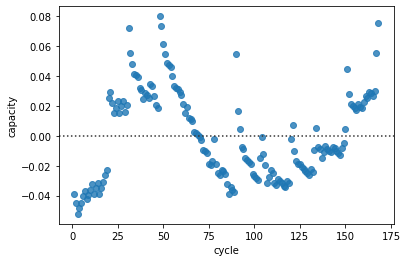

In [4]:
sns.residplot(dfB0005['cycle'], dfB0005['capacity'])

In [5]:
dfB0006 = getDataframe(B0006)
dfB0007 = getDataframe(B0007)
dfB0018 = getDataframe(B0018)

X = dfB0007['cycle']
Y = dfB0007['capacity']

In [7]:
ax.scatter(X, Y, color='green', label='Battery')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [9]:
lst_x, lst_y = rollingAverage(X_train, y_train)
d = {'X_train':X_train.values,'y_train':y_train.values}
d = pd.DataFrame(d)
d = d[~d['X_train'].isin(lst_x)]
X_train = d['X_train']
y_train = d['y_train']

In [11]:
ax.scatter(X_train, y_train, color='green', label='Battery capacity data')
ax.scatter(lst_x, lst_y, color='red', label='Outliers')
ax.legend()

In [12]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

best_svr = SVR(C=20, epsilon=0.0001, gamma=0.00001, cache_size=200,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

best_svr.fit(X_train,y_train)

y_pred = best_svr.predict(X.values.reshape(-1, 1))

/home/aimran/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


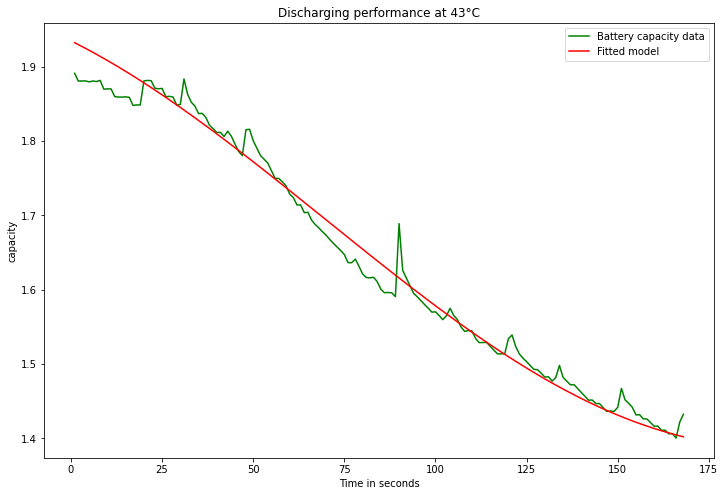

In [13]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, Y, color='green', label='Battery capacity data')
ax.plot(X, y_pred, color='red', label='Fitted model')
ax.set(xlabel='Time in seconds', ylabel='capacity', title='Discharging performance at 43°C')
ax.legend()